### Another Example

#### In this example we will produce a single stacked barchart graph of ratings by genres

#### 1. We start in the same way by loading the file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

input_file = '..\data\movie_ratings_summary.csv'
df_movies = pd.read_csv(input_file, sep=',')

#### 2. We need to add a new column, the total count of the reviews for each movie

In [2]:
# the '\' characters are line continuation characters. The indentation here is my choice, Python doesn't insist on it
df_movies['Total'] = df_movies.Awful + \
                     df_movies.Bad + \
                     df_movies.Average + \
                     df_movies.Good + \
                     df_movies.Excellent
df_movies.head()

,title,genres,Awful,Bad,Average,Good,Excellent,Total
0,'Tis the Season for Love (2015),Romance,0,1,0,0,0,1
1,"'burbs, The (1989)",Comedy,2,3,3,6,3,17
2,'night Mother (1986),Drama,0,0,1,0,0,1
3,10 Cloverfield Lane (2016),Thriller,0,0,5,7,2,14
4,100 Streets (2016),Drama,0,0,1,0,0,1


#### 3. We don't need the title column so we will drop it. When we do the aggregate, genres will become the index column.

In [3]:
df_movies.drop(columns='title', inplace = True)
df_groupedby = df_movies.groupby(['genres']).agg(sum)
df_groupedby.head()

,Awful,Bad,Average,Good,Excellent,Total
genres,,,,,,
Action,17,37,64,49,19,186
Adventure,1,8,5,4,1,19
Animation,1,2,6,10,16,35
Children,1,2,4,1,0,8
Comedy,484,1084,2129,2440,1059,7196


#### 4. We can now change the Awful to Excellent columns to represent % of the total, after which we can remove the total column

In [4]:
df_groupedby['Awful'] = (df_groupedby['Awful']/df_groupedby['Total'])*100
df_groupedby['Bad'] = (df_groupedby['Bad']/df_groupedby['Total'])*100
df_groupedby['Average'] = (df_groupedby['Average']/df_groupedby['Total'])*100
df_groupedby['Good'] = (df_groupedby['Good']/df_groupedby['Total'])*100
df_groupedby['Excellent'] = (df_groupedby['Excellent']/df_groupedby['Total'])*100

df_groupedby.drop(columns='Total', inplace=True)
df_groupedby

,Awful,Bad,Average,Good,Excellent
genres,,,,,
Action,9.139785,19.892473,34.408602,26.344086,10.215054
Adventure,5.263158,42.105263,26.315789,21.052632,5.263158
Animation,2.857143,5.714286,17.142857,28.571429,45.714286
Children,12.500000,25.000000,50.000000,12.500000,0.000000
Comedy,6.725959,15.063924,29.585881,33.907727,14.716509
Crime,0.000000,4.761905,42.857143,33.333333,19.047619
Documentary,1.459035,2.356902,15.937149,53.647587,26.599327
Drama,2.273089,5.340963,22.873947,45.859164,23.652837
Fantasy,0.000000,9.090909,13.636364,54.545455,22.727273


#### 5. We can now create the graph, and the png file in much the sme way as before.

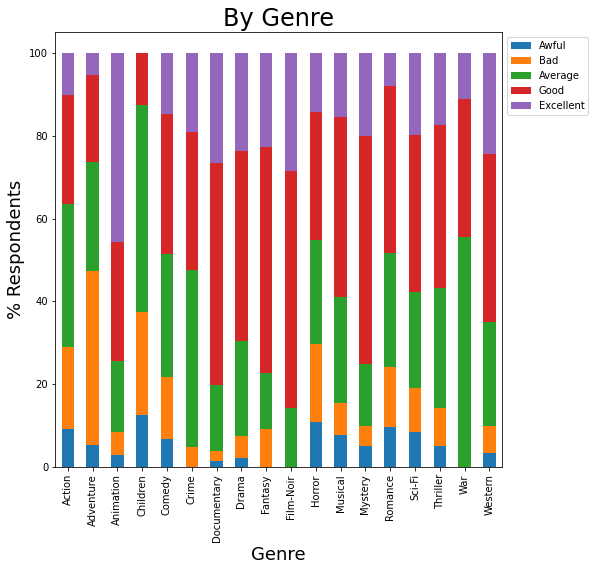

In [5]:
df_groupedby \
          .plot(kind='bar', stacked=True ) \
          .legend(bbox_to_anchor=(1, 1))
plt.title("By Genre", fontsize=24)
plt.ylabel('% Respondents', fontsize=18)
plt.xlabel('Genre', fontsize=18)
plt.gcf().set_size_inches(8, 8) 
plt.savefig('respondents.png', bbox_inches='tight')

#### 6. Had I not removed the Total column, I could have explicitly listed the columns I wanted included

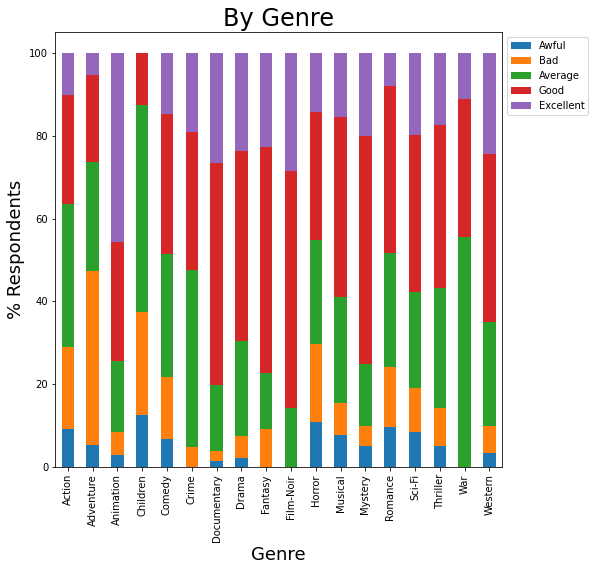

In [6]:
df_groupedby[['Awful','Bad','Average', 'Good', 'Excellent']] \
          .plot(kind='bar', stacked=True ) \
          .legend(bbox_to_anchor=(1, 1))
plt.title("By Genre", fontsize=24)
plt.ylabel('% Respondents', fontsize=18)
plt.xlabel('Genre', fontsize=18)
plt.gcf().set_size_inches(8, 8) 
plt.savefig('respondents.png', bbox_inches='tight')